In [26]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

DATA_DIR = "./data/kaggle-wood-defects"

def count_yolo_classes(labels_dir):
    class_counts = Counter()
    n_bbox_counts = Counter()
    
    # Iterate over all label files
    for filename in os.listdir(labels_dir):
        if filename.endswith(".txt"):  # Ensure only text files are read
            file_path = os.path.join(labels_dir, filename)
            with open(file_path, "r") as file:
                lines = file.readlines()
                n_bbox_counts[len(lines)] += 1
                if not lines:
                    class_counts["No labels"] += 1  # Count empty files
                else:
                    for line in lines:
                        parts = line.strip().split()
                        if parts:
                            class_id = parts[0]  # First element is class ID
                            class_counts[class_id] += 1
    
    return class_counts, n_bbox_counts


labels_directory = f"{DATA_DIR}/bboxes"  
class_counts, n_bbox_counts = count_yolo_classes(labels_directory)

labelcounts = pd.Series(class_counts, name="Occurances").sort_index()
bbox_per_img = pd.Series(n_bbox_counts, name="N_BBoxes").sort_index()


<Axes: title={'center': 'Number of Defect Boxes Per Image'}>

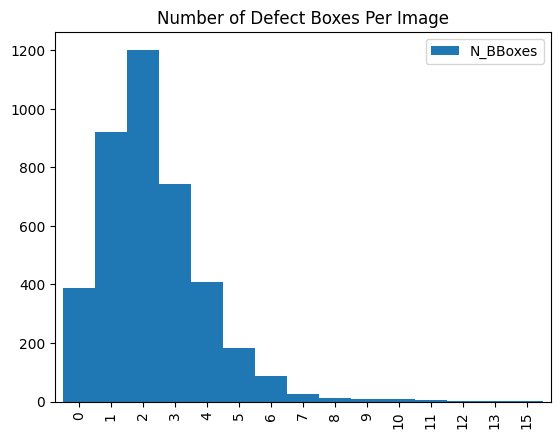

In [28]:
df_bbox = bbox_per_img.to_frame()
df_bbox.plot.bar(width=1, title="Number of Defect Boxes Per Image")

<Axes: title={'center': 'Label Counts'}>

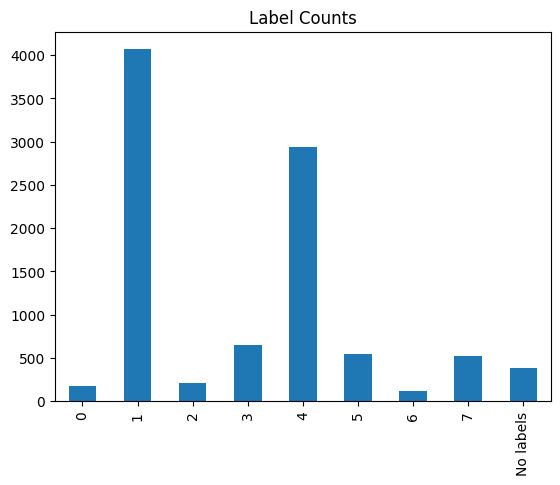

In [3]:
labelcounts.plot.bar(title="Label Counts")